# HEALTH INSURANCE ANALYTICS

## Problem Statement
#### The problem statement typically revolves around accurately predicting the cost of insurance premiums for individuals based on their demographic, health, and lifestyle factors. The aim is to use machine learning models to identify patterns and relationships between features such as age, gender, BMI (Body Mass Index), smoking status, region, and medical history, and the corresponding insurance costs.

# Step 1 : Importing necessary libraries

#### Why we're importing these libraries:

- `pandas` and `numpy` are used for data manipulation and numerical operations.
- `matplotlib.pyplot` and `seaborn` are used for data visualization.
- `scipy.stats.skew` helps in identifying skewness in numerical features.
- `sklearn.metrics` provides evaluation metrics to assess model performance.
- `warnings.filterwarnings('ignore')` is used to suppress unnecessary warnings for a cleaner output.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

# Step 2 : Load the Dataset

#### What we are doing:
We are reading the dataset using the `pd.read_csv()`.

#### Why this is important:
This step allows us to load the raw data into a structured format (a DataFrame), which can be easily explored and manipulated using pandas. Viewing the first few rows gives a quick preview of the data, helping us understand its structure, features, and any immediate issues (e.g., missing values or incorrect data types).

In [8]:
data = pd.read_csv("healthinsurance.csv")

In [9]:
data

age     sex  weight   bmi hereditary_diseases  no_of_dependents  \
0      60.0    male      64  24.3           NoDisease                 1   
1      49.0  female      75  22.6           NoDisease                 1   
2      32.0  female      64  17.8            Epilepsy                 2   
3      61.0  female      53  36.4           NoDisease                 1   
4      19.0  female      50  20.6           NoDisease                 0   
...     ...     ...     ...   ...                 ...               ...   
14995  39.0    male      49  28.3           NoDisease                 1   
14996  39.0    male      74  29.6           NoDisease                 4   
14997  20.0    male      62  33.3           NoDisease                 0   
14998  52.0    male      88  36.7           NoDisease                 0   
14999  52.0    male      57  26.4           NoDisease                 3   

       smoker         city  bloodpressure  diabetes  regular_ex  \
0           0      NewYork             72         0           0   
1           0       Boston             78         1           1   
2           1  Phildelphia             88         1           1   
3           1    Pittsburg             72         1           0   
4           0      Buffalo             82         1           0   
...       ...          ...            ...       ...         ...   
14995       1     Florence             54         1           0   
14996       0        Miami             64         1           0   
14997       0        Tampa             52         1           0   
14998       0   PanamaCity             70         1           0   
14999       0    Kingsport             72         1           0   

             job_title    claim  
0                Actor  13112.6  
1             Engineer   9567.0  
2          Academician  32734.2  
3                 Chef  48517.6  
4           HomeMakers   1731.7  
...                ...      ...  
14995        FilmMaker  21082.2  
14996          Student   7512.3  
14997  FashionDesigner   1391.5  
14998           Farmer   9144.6  
14999          Manager  25992.8  

[15000 rows x 13 columns]

# Step 3 : Exploratory Data Analysis (EDA)

####  Dataset Overview
- Checking the first few rows with `.head()`.
- Viewing the last few rows with `.tail()`.

### Why: 
These steps help us understand the structure, number of rows/columns, and get a sense of how the data looks. It sets the stage for deeper exploration."

In [13]:
data.head()

age     sex  weight   bmi hereditary_diseases  no_of_dependents  smoker  \
0  60.0    male      64  24.3           NoDisease                 1       0   
1  49.0  female      75  22.6           NoDisease                 1       0   
2  32.0  female      64  17.8            Epilepsy                 2       1   
3  61.0  female      53  36.4           NoDisease                 1       1   
4  19.0  female      50  20.6           NoDisease                 0       0   

          city  bloodpressure  diabetes  regular_ex    job_title    claim  
0      NewYork             72         0           0        Actor  13112.6  
1       Boston             78         1           1     Engineer   9567.0  
2  Phildelphia             88         1           1  Academician  32734.2  
3    Pittsburg             72         1           0         Chef  48517.6  
4      Buffalo             82         1           0   HomeMakers   1731.7

In [14]:
data.tail()

age   sex  weight   bmi hereditary_diseases  no_of_dependents  smoker  \
14995  39.0  male      49  28.3           NoDisease                 1       1   
14996  39.0  male      74  29.6           NoDisease                 4       0   
14997  20.0  male      62  33.3           NoDisease                 0       0   
14998  52.0  male      88  36.7           NoDisease                 0       0   
14999  52.0  male      57  26.4           NoDisease                 3       0   

             city  bloodpressure  diabetes  regular_ex        job_title  \
14995    Florence             54         1           0        FilmMaker   
14996       Miami             64         1           0          Student   
14997       Tampa             52         1           0  FashionDesigner   
14998  PanamaCity             70         1           0           Farmer   
14999   Kingsport             72         1           0          Manager   

         claim  
14995  21082.2  
14996   7512.3  
14997   1391.5  
14998   9144.6  
14999  25992.8

#### Use .info() to view:
 * Data types of columns (e.g., integer, float, object).
 * Non-null values (helps identify missing data).
 * Memory usage of the dataset.

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  14604 non-null  float64
 1   sex                  15000 non-null  object 
 2   weight               15000 non-null  int64  
 3   bmi                  14044 non-null  float64
 4   hereditary_diseases  15000 non-null  object 
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  object 
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  object 
 12  claim                15000 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.5+ MB


#### Use .shape to understand the size of the dataset (rows, columns).

In [18]:
print(data.shape)

(15000, 13)


### Statistical Summary of the Dataset

#### What we are doing:
We're using the `.describe()` function to generate summary statistics for all numeric columns in the dataset, including count, mean, standard deviation, min, max, and quartile values.

#### Why this is important:
This helps us quickly understand the distribution and central tendency of the data. It also helps identify outliers, inconsistencies, or unusual values that may need special attention during preprocessing or modeling.

In [20]:
print(data.describe())
data.describe(include=object)

                age        weight           bmi  no_of_dependents  \
count  14604.000000  15000.000000  14044.000000      15000.000000   
mean      39.547521     64.909600     30.266413          1.129733   
std       14.015966     13.701935      6.122950          1.228469   
min       18.000000     34.000000     16.000000          0.000000   
25%       27.000000     54.000000     25.700000          0.000000   
50%       40.000000     63.000000     29.400000          1.000000   
75%       52.000000     76.000000     34.400000          2.000000   
max       64.000000     95.000000     53.100000          5.000000   

             smoker  bloodpressure      diabetes    regular_ex         claim  
count  15000.000000   15000.000000  15000.000000  15000.000000  15000.000000  
mean       0.198133      68.650133      0.777000      0.224133  13401.437620  
std        0.398606      19.418515      0.416272      0.417024  12148.239619  
min        0.000000       0.000000      0.000000      0.000000

sex hereditary_diseases        city job_title
count    15000               15000       15000     15000
unique       2                  10          91        35
top     female           NoDisease  NewOrleans   Student
freq      7652               13998         302      1320

In [21]:
data.describe(include='all')

age     sex        weight           bmi hereditary_diseases  \
count   14604.000000   15000  15000.000000  14044.000000               15000   
unique           NaN       2           NaN           NaN                  10   
top              NaN  female           NaN           NaN           NoDisease   
freq             NaN    7652           NaN           NaN               13998   
mean       39.547521     NaN     64.909600     30.266413                 NaN   
std        14.015966     NaN     13.701935      6.122950                 NaN   
min        18.000000     NaN     34.000000     16.000000                 NaN   
25%        27.000000     NaN     54.000000     25.700000                 NaN   
50%        40.000000     NaN     63.000000     29.400000                 NaN   
75%        52.000000     NaN     76.000000     34.400000                 NaN   
max        64.000000     NaN     95.000000     53.100000                 NaN   

        no_of_dependents        smoker        city  bloodpressure  \
count       15000.000000  15000.000000       15000   15000.000000   
unique               NaN           NaN          91            NaN   
top                  NaN           NaN  NewOrleans            NaN   
freq                 NaN           NaN         302            NaN   
mean            1.129733      0.198133         NaN      68.650133   
std             1.228469      0.398606         NaN      19.418515   
min             0.000000      0.000000         NaN       0.000000   
25%             0.000000      0.000000         NaN      64.000000   
50%             1.000000      0.000000         NaN      71.000000   
75%             2.000000      0.000000         NaN      80.000000   
max             5.000000      1.000000         NaN     122.000000   

            diabetes    regular_ex job_title         claim  
count   15000.000000  15000.000000     15000  15000.000000  
unique           NaN           NaN        35           NaN  
top              NaN           NaN   Student           NaN  
freq             NaN           NaN      1320           NaN  
mean        0.777000      0.224133       NaN  13401.437620  
std         0.416272      0.417024       NaN  12148.239619  
min         0.000000      0.000000       NaN   1121.900000  
25%         1.000000      0.000000       NaN   4846.900000  
50%         1.000000      0.000000       NaN   9545.650000  
75%         1.000000      0.000000       NaN  16519.125000  
max         1.000000      1.000000       NaN  63770.400000

### Checking Unique Values in Each Column

#### What we are doing:
We are using `.unique()` function  to examine how many distinct values exist in each column.

#### Why this is important:
This helps us understand the variability of the data, identify categorical vs. numerical features, and detect potential issues such as unexpected or inconsistent entries. It also guides us in choosing the right preprocessing techniques (e.g., encoding methods for categorical data).


In [23]:
for i in data.columns:
    print("unique in",i,':',data[i].unique())

unique in age : [60. 49. 32. 61. 19. 42. 18. 21. 63. 40. 51. 59. 27. 56. 52. 20. 24. 53.
 38. 54. 64. 50. 46. 55. 36. 44. 62. 48. 31. 43. 47. 41. 22. 45. 57. nan
 23. 58. 28. 34. 26. 35. 25. 37. 33. 29. 30. 39.]
unique in sex : ['male' 'female']
unique in weight : [64 75 53 50 89 59 52 55 69 68 45 67 46 76 44 60 82 40 71 61 70 84 51 48
 62 94 41 57 49 85 79 90 72 43 65 91 88 80 74 47 56 54 83 73 81 77 66 58
 86 95 93 78 92 63 42 87 34 36]
unique in bmi : [24.3 22.6 17.8 36.4 20.6 37.9 23.8 26.8  nan 29.6 33.  36.5 24.6 35.7
 18.9 40.3 27.2 41.3 38.4 28.5 31.8 31.3 25.7 25.3 24.8 39.4 25.5 26.9
 24.  37.1 44.8 25.1 32.3 28.7 35.2 26.7 26.4 22.3 25.8 21.9 40.2 38.6
 39.2 28.9 25.9 32.7 29.7 26.  35.6 46.8 34.2 23.1 31.6 40.9 27.6 22.9
 18.3 25.2 34.4 34.1 23.9 22.1 32.2 38.3 37.3 33.2 33.3 27.7 31.4 46.5
 35.3 27.5 23.5 21.5 20.2 21.8 34.3 39.8 38.1 32.  20.5 26.6 28.3 25.
 27.4 39.7 29.8 29.4 23.2 40.  17.5 20.1 18.5 24.1 43.3 36.  29.9 41.8
 31.  23.7 32.8 32.9 36.1 27.  34.9 47.8 28.6

### Handling Missing Values

#### What we are doing:
We are checking for missing values using `.isnull().sum()` and applying strategies to handle them, such as filling or dropping.

#### Why this is important:
Missing data can lead to incorrect analysis and affect model performance. Handling them ensures the dataset is clean and ready for accurate modeling.


In [25]:
print(data.isnull().values.any())

True


In [26]:
print(data.isna().sum())

age                    396
sex                      0
weight                   0
bmi                    956
hereditary_diseases      0
no_of_dependents         0
smoker                   0
city                     0
bloodpressure            0
diabetes                 0
regular_ex               0
job_title                0
claim                    0
dtype: int64


#### Replaces missing values with specified values
#### Helps in handling missing data effectively to maintain dataset integrity.

### Handling Missing Values with Mean Imputation

#### What we are doing:
We are filling in missing values in the dataset using the mean of numerical column like age and bmi. This is done with the `.fillna(df.mean())` method.

#### Why this is important:
Missing values can disrupt the performance of machine learning models. Imputing missing values with the mean helps preserve the overall distribution of the data without introducing bias. It’s a quick and effective method when the data is normally distributed and the amount of missing data is small.


In [29]:
data['age'].fillna(data['age'].mean(), inplace=True)
data['bmi'].fillna(data['bmi'].mean(), inplace=True)

In [30]:
print(data.isnull().values.any())

False


### Checking for Duplicate Values

#### What we are doing:
We are using `df.duplicated().sum()` to check how many duplicate rows exist in the dataset.

#### Why this is important:
Duplicate records can skew the analysis and lead to biased model training. Identifying and removing duplicates ensures that each data point contributes equally, improving the quality and reliability of insights and predictions.


In [32]:
data.duplicated().sum()

1096

### Removing Duplicate Records

#### What we are doing:
We use the `drop_duplicates()` function to remove any rows that are exact duplicates in the dataset.

#### Why this is important:
Duplicate rows can bias the analysis and the machine learning model by giving more weight to certain data points. Removing them ensures that every data entry is unique, which leads to more accurate and reliable insights.

In [34]:
data.drop_duplicates(inplace=True)
data.reset_index(drop=True,inplace=True)

### Visualization

- Visualization is a key step in Exploratory Data Analysis (EDA) to understand the underlying patterns, distributions, and relationships within the dataset. It helps identify trends, detect outliers, and uncover correlations between features.

- These visual insights guide feature selection, transformation, and model strategy in the later stages of the machine learning pipeline.

#### Univariate Analysis
* Analysis of a single variable to understand its distribution and characteristics.

### Plotting Distributions of Numerical Columns

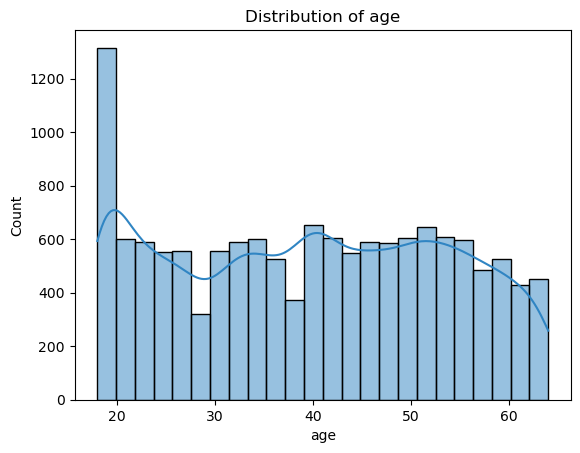

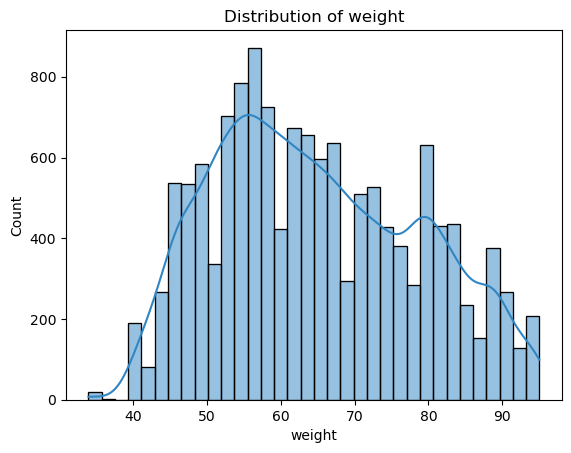

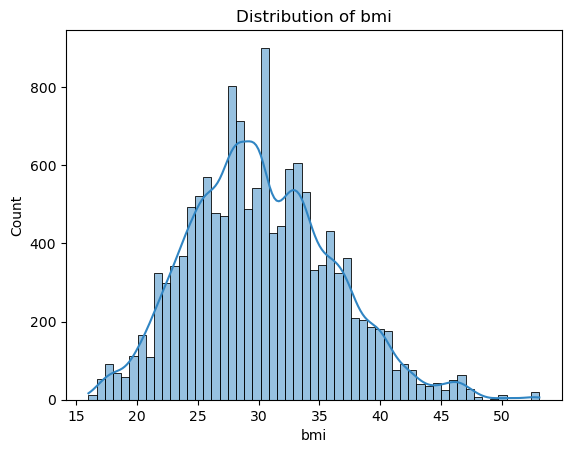

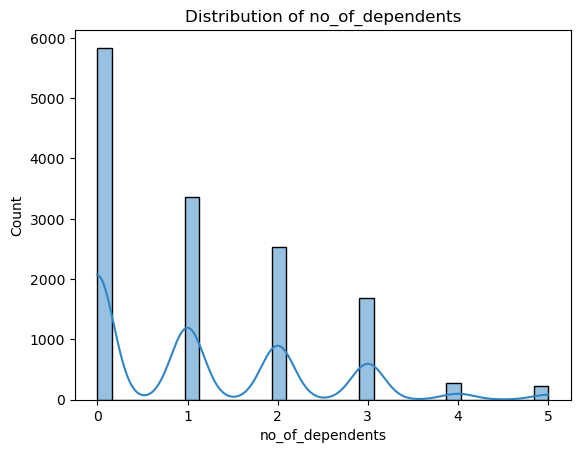

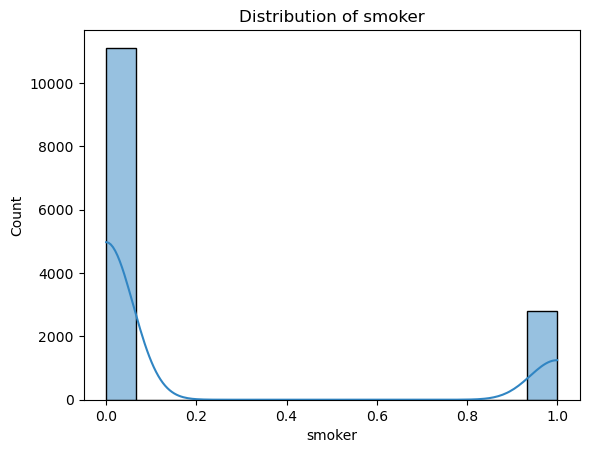

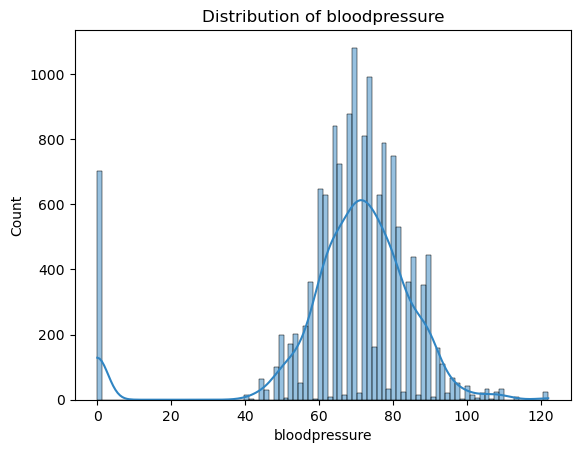

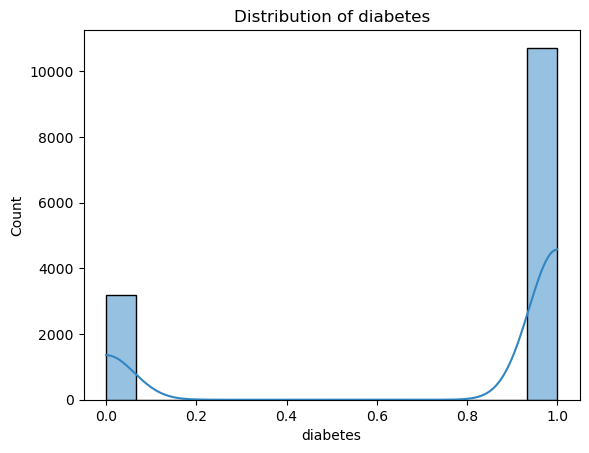

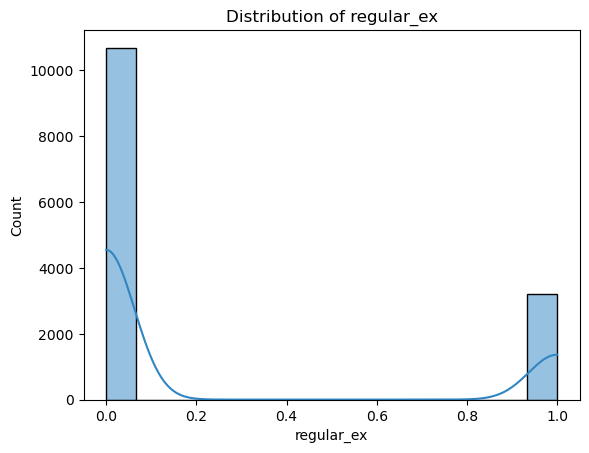

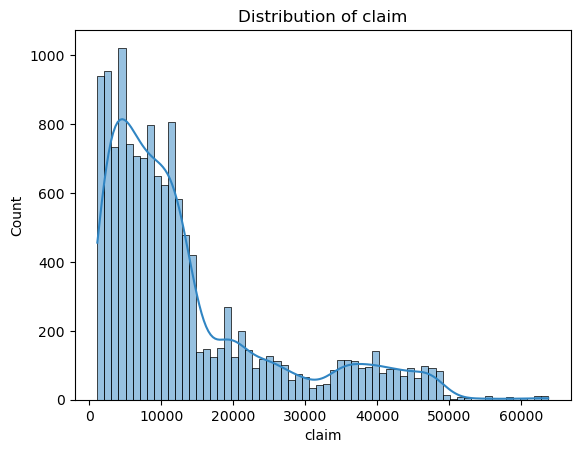

In [38]:
num_cols = data.select_dtypes(include=np.number).columns
for col in num_cols:
    sns.histplot(data[col], kde=True,color='#3085C3')
    plt.title(f"Distribution of {col}")
    plt.show()

### Pie Chart of Gender Distribution

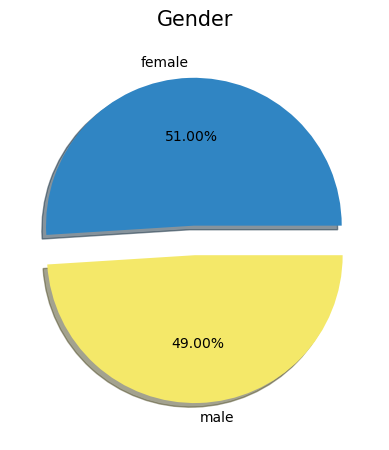

In [40]:
values = data.sex.value_counts().values
labels = ['female','male']
explode = (0.2,0)

plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.2f%%',colors=['#3085C3','#F4E869'])
plt.title('Gender',pad=32,fontsize=15,color='Black')
plt.show()

### Pie Chart of Smoker Percentage

Text(0.5, 1.0, 'Smoker Percentage')

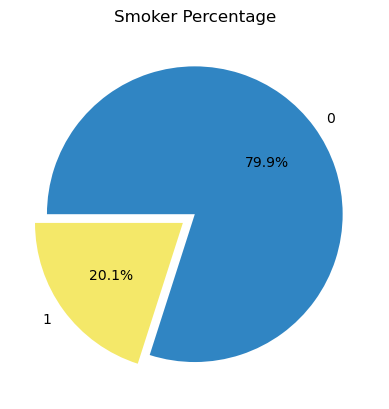

In [42]:
plt.pie(data.smoker.value_counts().reindex([1, 0]), labels=data.smoker.value_counts().reindex([1, 0]).index, autopct='%1.1f%%', explode=[0.1, 0], startangle=180,colors=['#F4E869','#3085C3'])
plt.title('Smoker Percentage')

### Pie Chart of Diabetes Distribution

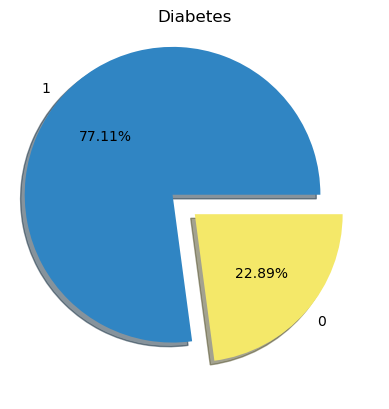

In [44]:
values = data.diabetes.value_counts().values
labels = data.diabetes.value_counts().keys()
explode = (0.2,0)

plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.2f%%',colors=['#3085C3','#F4E869'])
plt.title('Diabetes')
plt.show()

### Pie Chart of Regular Exercise Distribution

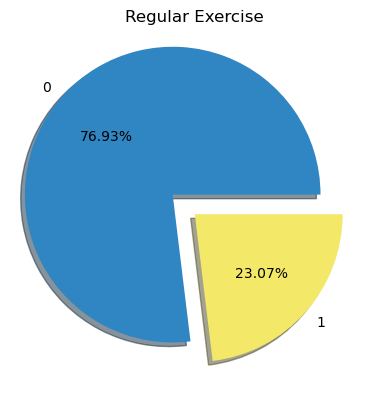

In [46]:
values = data.regular_ex.value_counts().values
labels = data.regular_ex.value_counts().keys()
explode = (0.2,0)

plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.2f%%',colors=['#3085C3','#F4E869'])

plt.title('Regular Exercise')
plt.show()

#### Bivariate Analysis
* Analysis of the relationship between two variables.

### Age vs Claim Scatter Plot and Age Statistics

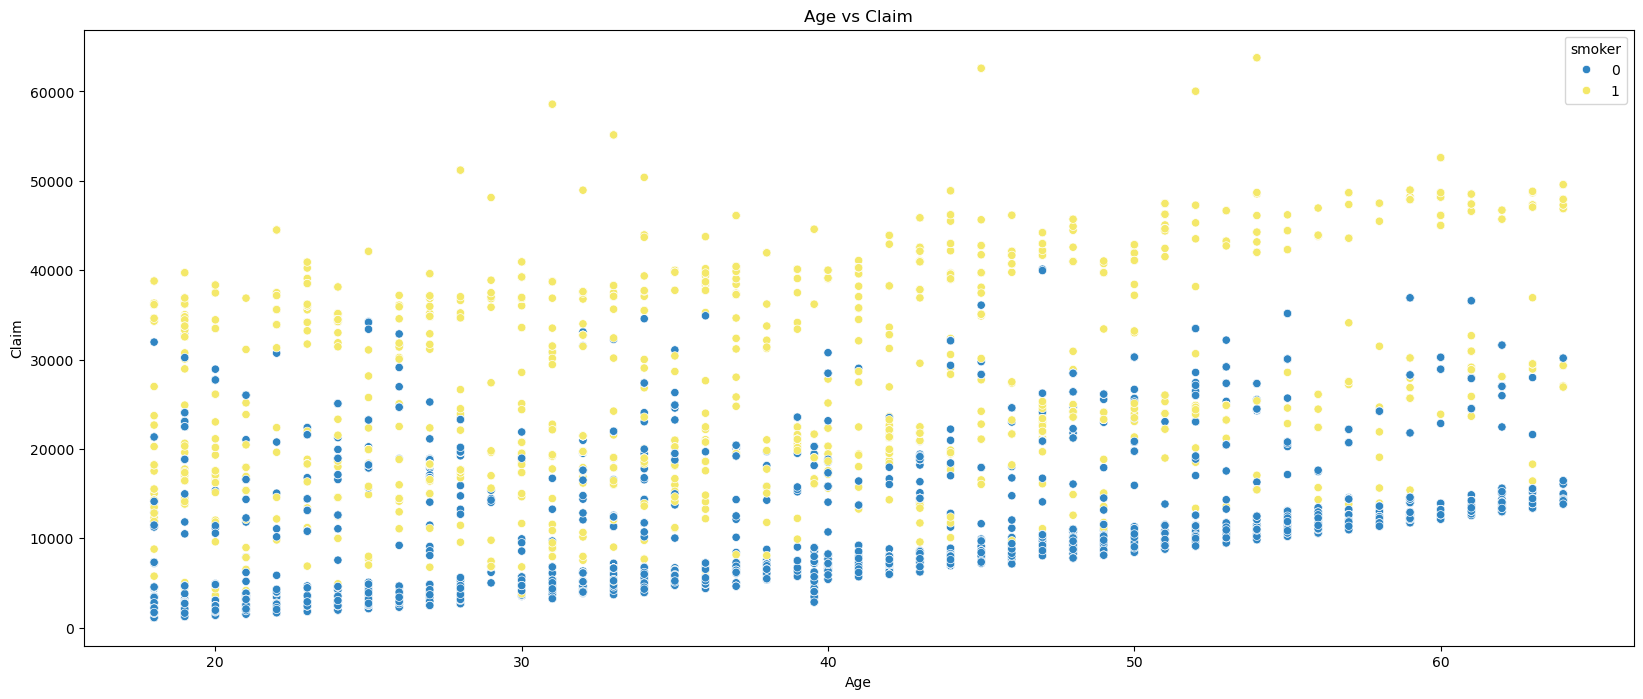

Skewness: 0.006241188212225505
Mean: 40
Median: 40.0
Minimum Age: 18.0
Maximum Age: 64.0


In [49]:
plt.figure(figsize=(20, 8))
sns.scatterplot(x='age', y='claim', data=data, hue='smoker',palette=['#3085C3','#F4E869'])
plt.title('Age vs Claim')
plt.xlabel('Age')
plt.ylabel('Claim')
plt.show()
print(f'Skewness: {data["age"].skew()}')
print(f'Mean: {(data["age"].mean()):.0f}')
print(f'Median: {data["age"].median()}')
print(f'Minimum Age: {data["age"].min()}')
print(f'Maximum Age: {data["age"].max()}')

### BMI vs Claim Scatter Plot

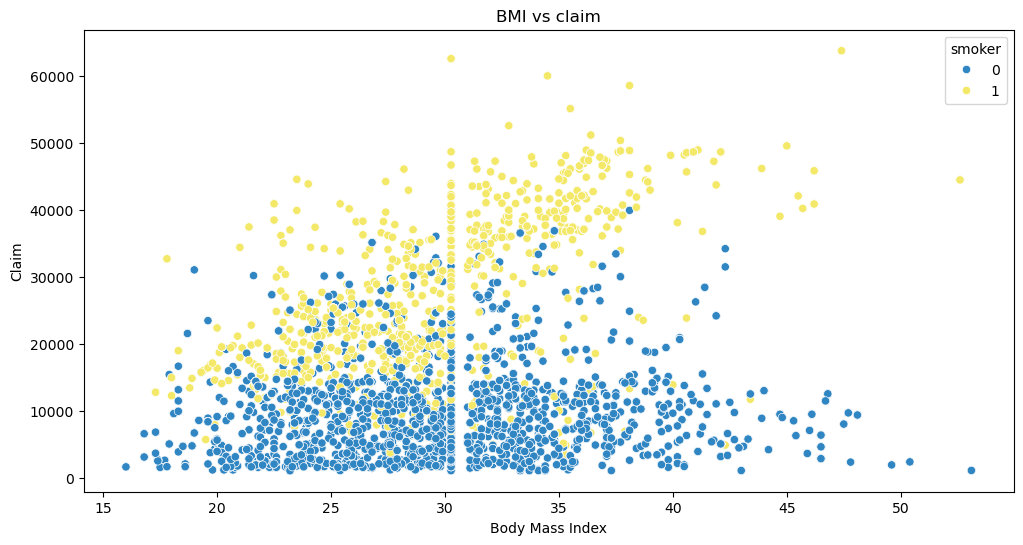

In [51]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='bmi', y='claim', data=data, hue='smoker',palette=['#3085C3','#F4E869'])
plt.title('BMI vs claim')
plt.xlabel('Body Mass Index')
plt.ylabel('Claim')
plt.show()

### Scatterplot of Claim Distribution by Number of Dependents

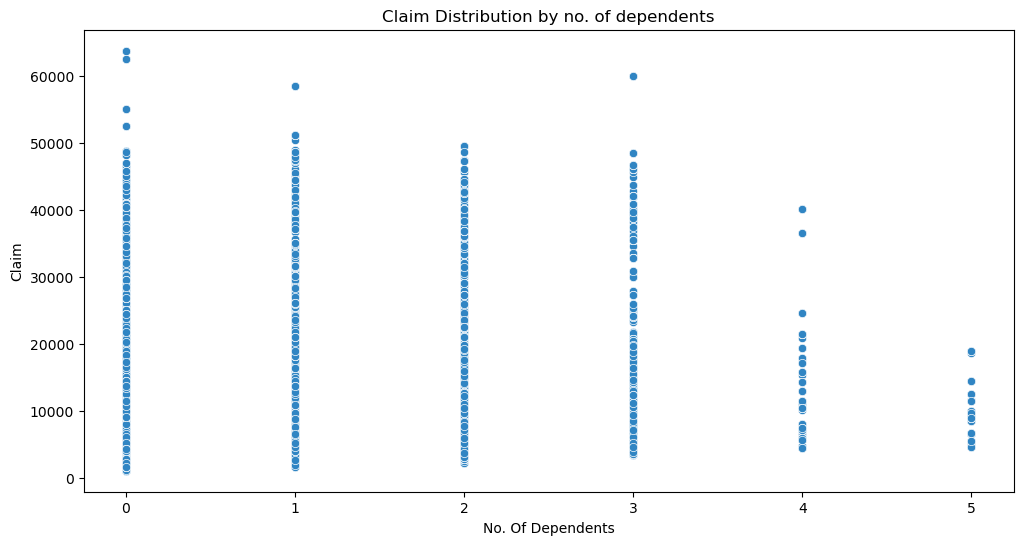

Mean: 1


In [53]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='no_of_dependents', y='claim', data=data, color='#3085C3')
plt.title('Claim Distribution by no. of dependents')
plt.xlabel('No. Of Dependents')
plt.ylabel('Claim')
plt.show()
print(f'Mean: {(data["no_of_dependents"].mean()):.0f}')

### Bar Chart for Claim Distribution by City

Text(0, 0.5, 'Claim Charges ($)')

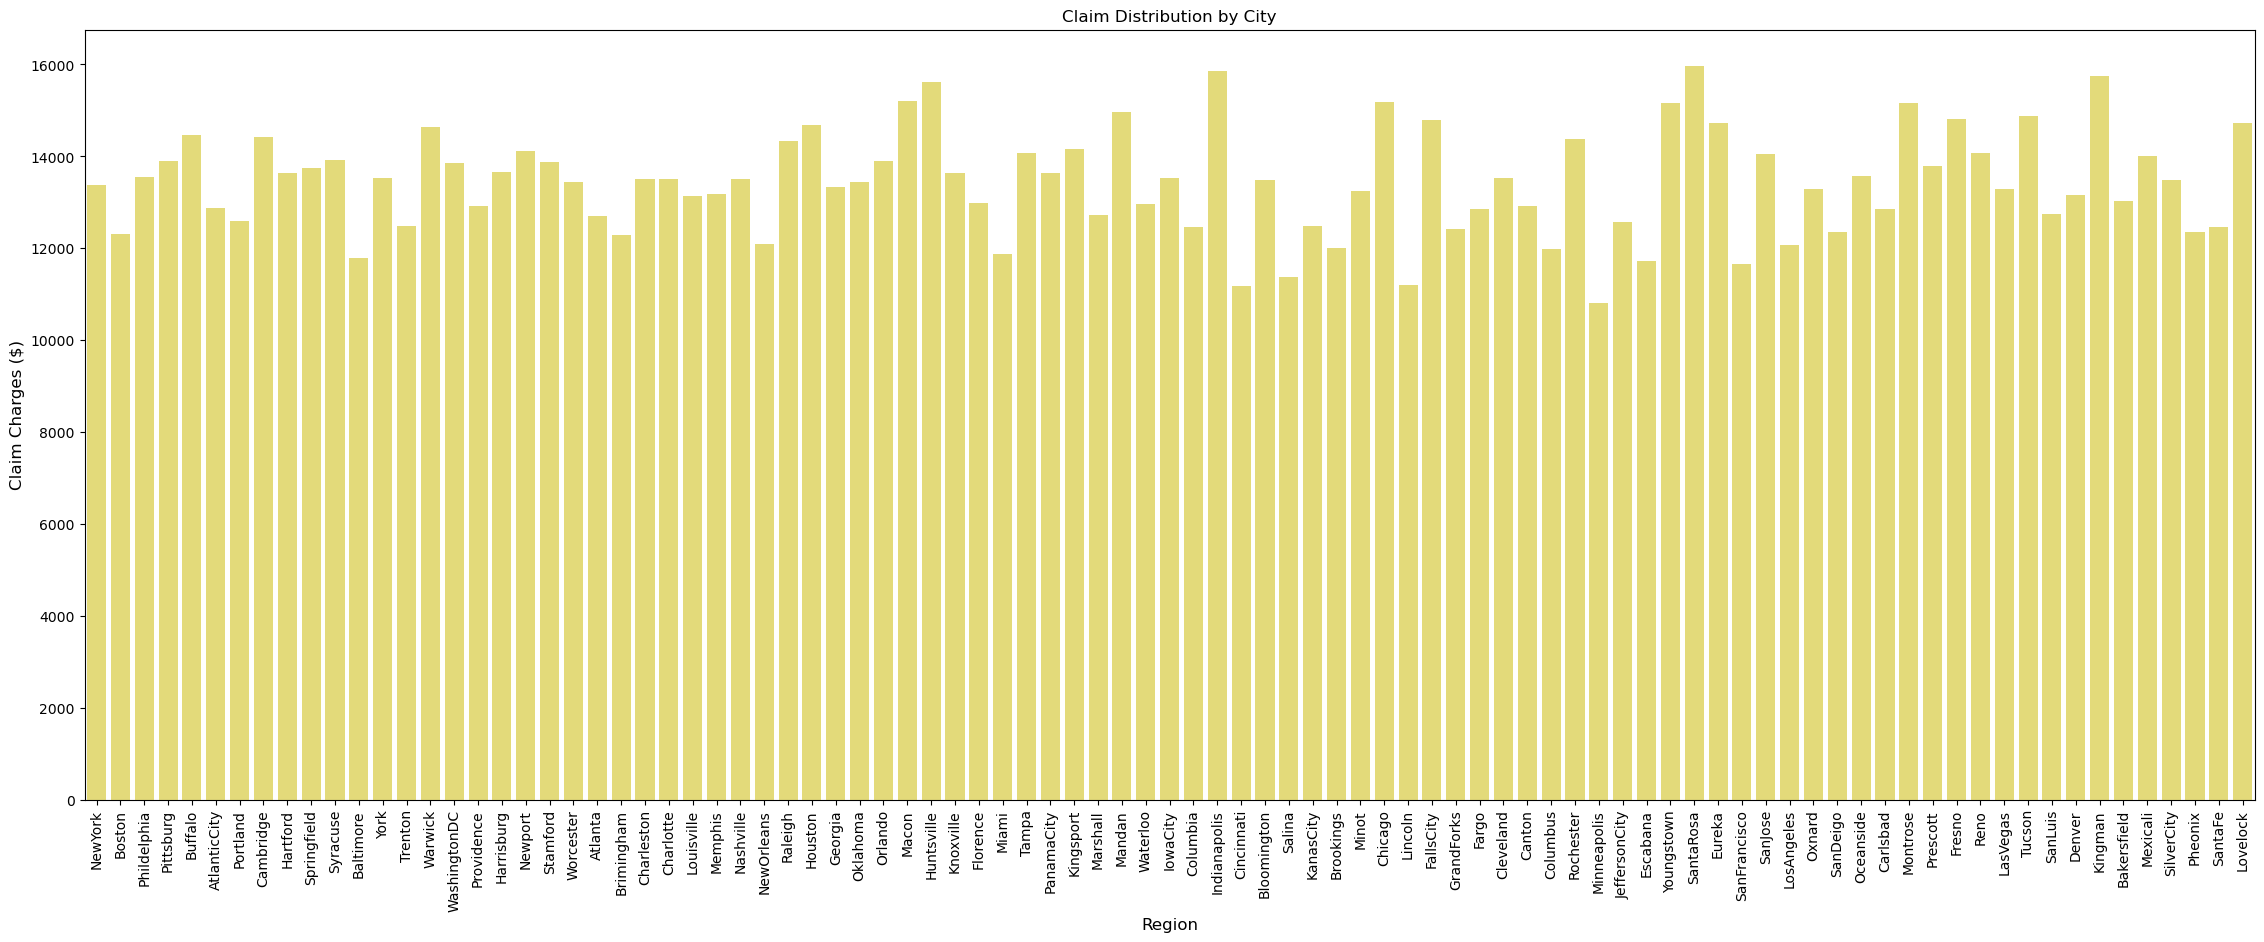

In [55]:
fig = plt.figure(figsize = (28,10))
plt.title('Claim Distribution by City')
sns.barplot(y = 'claim', 
            x = 'city', 
            data = data,
            ci = None,
            color='#F4E869')
# set labels
plt.xticks(rotation=90) 
plt.xlabel("Region", size=12)
plt.ylabel("Claim Charges ($)", size=12)

### Bar Chart for Total Claims by Hereditary Diseases

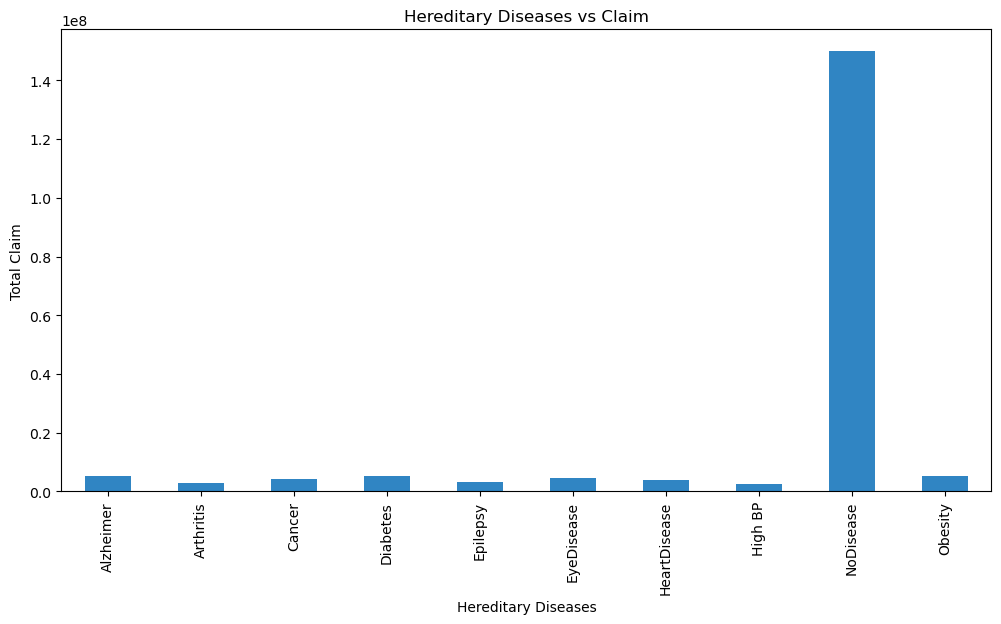

In [57]:
hereditary_claim = data.groupby('hereditary_diseases')['claim'].sum()
plt.figure(figsize=(12, 6))
hereditary_claim.plot(kind='bar', stacked=True,color='#3085C3')
plt.xlabel('Hereditary Diseases')
plt.ylabel('Total Claim')
plt.title('Hereditary Diseases vs Claim')
plt.show()

### Bar Chart for Total Claims by Job Title

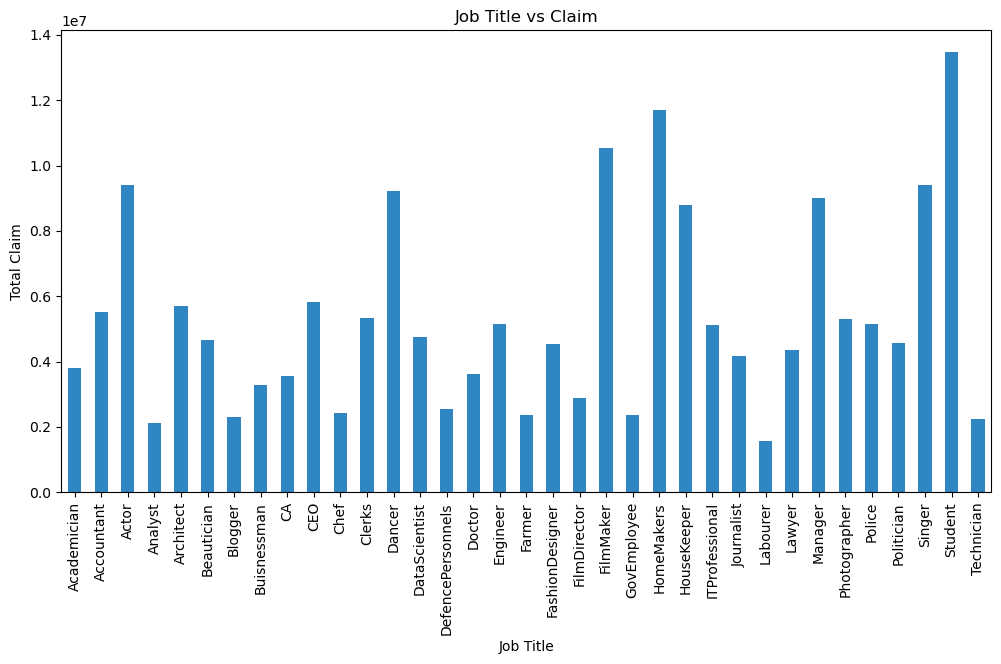

In [59]:
job_claim = data.groupby('job_title')['claim'].sum()
plt.figure(figsize=(12, 6))
job_claim.plot(kind='bar', stacked=True,color='#3085C3')
plt.xlabel('Job Title')
plt.ylabel('Total Claim')
plt.xticks(rotation=90)
plt.title('Job Title vs Claim')
plt.show()

### Strip Plot for Regular Exercise vs Claim by Gender

<Axes: xlabel='regular_ex', ylabel='claim'>

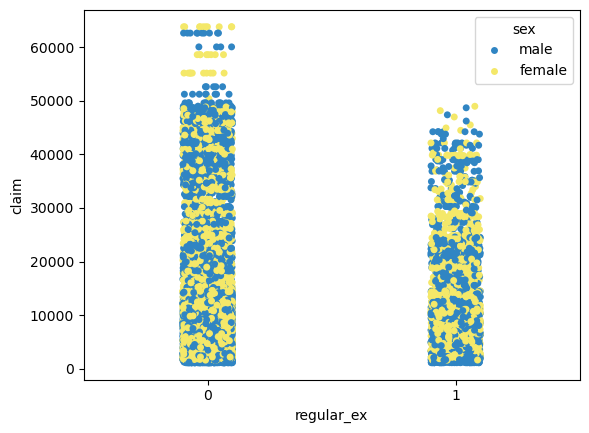

In [61]:
sns.stripplot(x='regular_ex',y='claim',data=data,hue='sex',palette=['#3085C3','#F4E869'])

### Multivariate Analysis
- Definition: Analysis of relationships among three or more variables.

- Purpose: Explores complex interactions and their combined effects.

### Pair Plot for Exploring Relationships in the Data by Gender

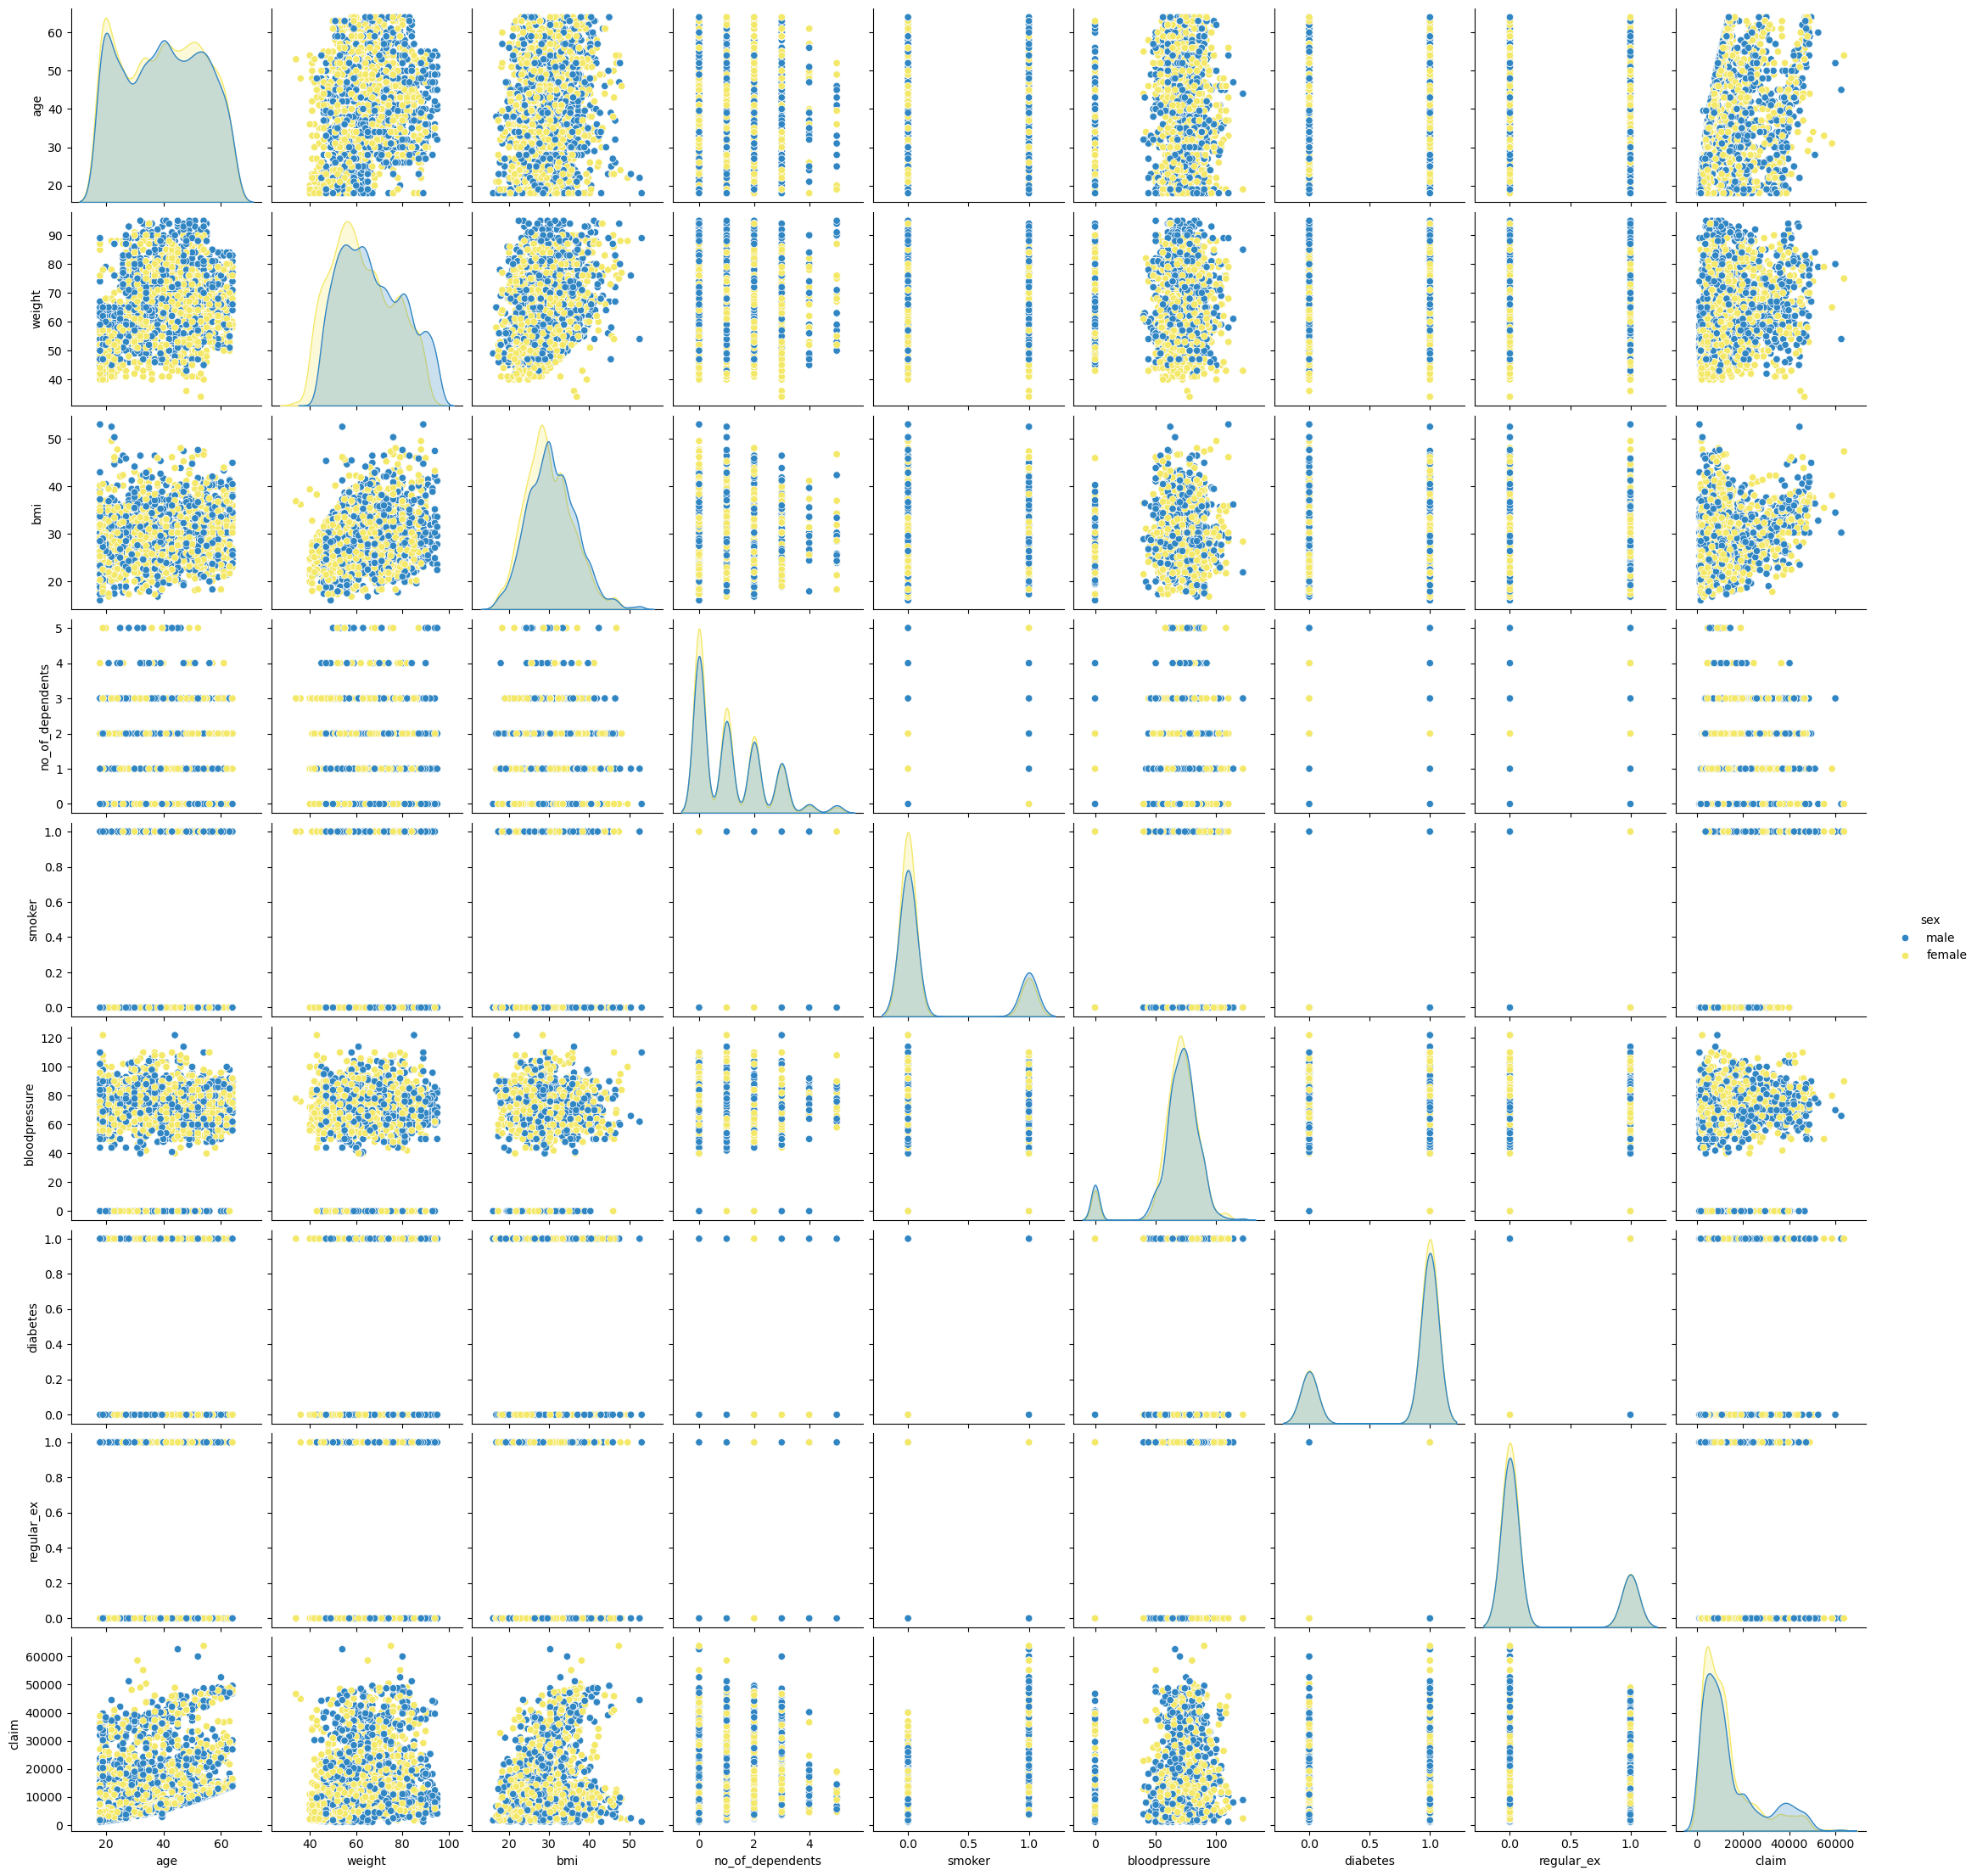

In [64]:
sns.pairplot(data, hue = 'sex',palette=['#3085C3','#F4E869'])
plt.show()

### Feature Categorization in the Dataset

#### **Categorical Columns**
These columns represent categorical variables and contain discrete values:
- **Sex**: Gender of the individual (e.g., male, female).
- **City**: Location or region of the individual.
- **Job Title**: Occupation of the individual.
- **Diabetes**: Presence or absence of diabetes (e.g., yes, no).
- **Regular Exercise**: Whether the individual exercises regularly (e.g., yes, no).
- **Smoker**: Smoking habits of the individual (e.g., smoker, non-smoker).

#### **Numerical Columns**
These columns represent numerical variables and contain continuous values:
- **Age**: Age of the individual.
- **Weight**: Body weight in kilograms (kg).
- **BMI**: Body Mass Index, calculated using height and weight.
- **Blood Pressure**: Measure of blood pressure (mmHg).
- **Claim**: Insurance claim amount.




In [66]:
cat_col=['sex','city','job_title',"diabetes",'regular_ex','smoker']
num_col = ['age', 'weight', 'bmi','bloodpressure','claim']

# Step 4 : Data Cleaning

### Box Plot Visualization for Outlier Detection

- To identify potential outliers in the dataset, we use **box plots** for the numerical columns.  
- Box plots help visualize the distribution, median, quartiles, and any values that fall significantly outside the expected range (i.e., outliers).

- Points outside the whiskers indicate **potential outliers**
- The box represents the **interquartile range (IQR)** (25th to 75th percentile)
- The line inside the box is the **median**

### Why this is important:

- This step is crucial in understanding which features might need treatment for outliers (e.g., removal, capping, or transformation).

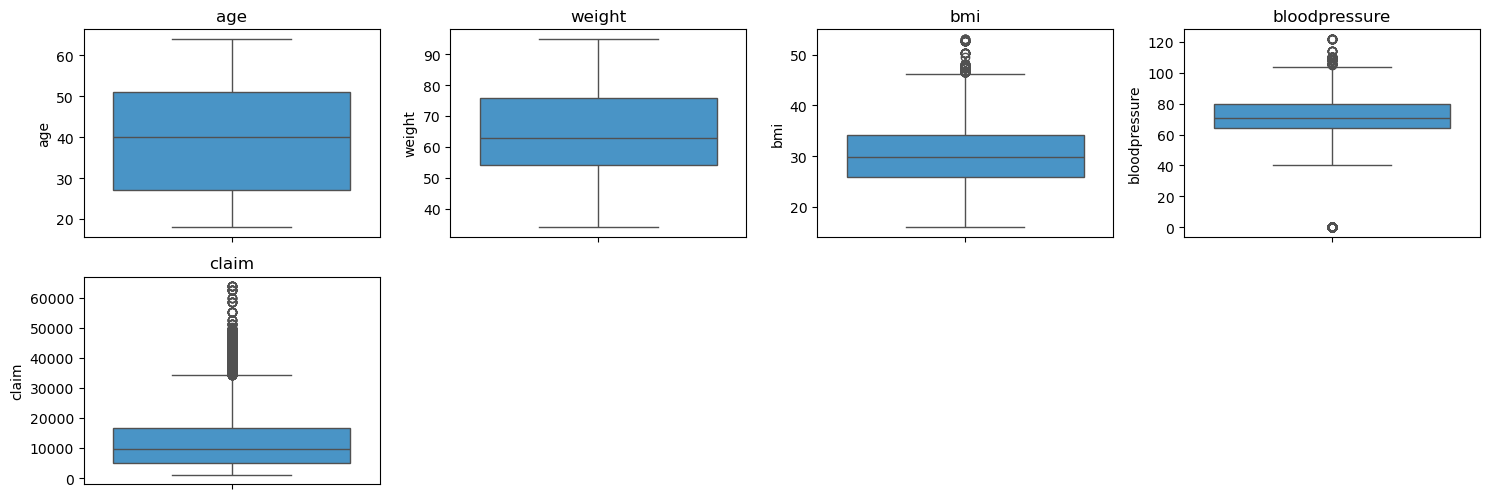

In [69]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(num_col, 1):
    plt.subplot(4, 4, i) 
    sns.boxplot(data=data[column], color='#3498DB')
    plt.title(column)

plt.tight_layout()
plt.show()

### Handling Outliers with IQR Method

1. **Calculate Quartiles**:
   - `Q1 = data[col].quantile(0.25)`:
     - Computes the first quartile (25th percentile) of the column.
   - `Q3 = data[col].quantile(0.75)`:
     - Computes the third quartile (75th percentile) of the column.

2. **Interquartile Range (IQR)**:
   - `IQR = Q3 - Q1`:
     - Measures the spread of the middle 50% of the data.

3. **Determine Outlier Bounds**:
   - `lower_bound = Q1 - 1.5 * IQR`:
     - Calculates the lower threshold for outliers.
   - `upper_bound = Q3 + 1.5 * IQR`:
     - Calculates the upper threshold for outliers.

4. **Cap or Floor Outliers**:
   - `data[col] = np.where(data[col] < lower_bound, lower_bound, np.where(data[col] > upper_bound, upper_bound, data[col]))`:
     - Applies conditional logic:
       - If the value is below the lower bound, it is replaced with `lower_bound`.
       - If the value is above the upper bound, it is replaced with `upper_bound`.
       - Otherwise, the value remains unchanged.

5. **Iterate Through Numerical Columns**:
   - `for col in num_col:`:
     - Loops through all numerical columns to apply the outlier treatment.

In [71]:
for col in num_col:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    data[col] = np.where(data[col] < lower_bound, lower_bound,
                         np.where(data[col] > upper_bound, upper_bound, data[col]))

### Box Plots After Outlier Treatment :

- To verify the effectiveness of outlier treatment, we visualize the numerical columns using box plots once again. This helps confirm that extreme values have been addressed and the distributions look more normalized and consistent.

- By comparing these updated plots with the earlier ones, we can ensure the data is now cleaner and better suited for model training.


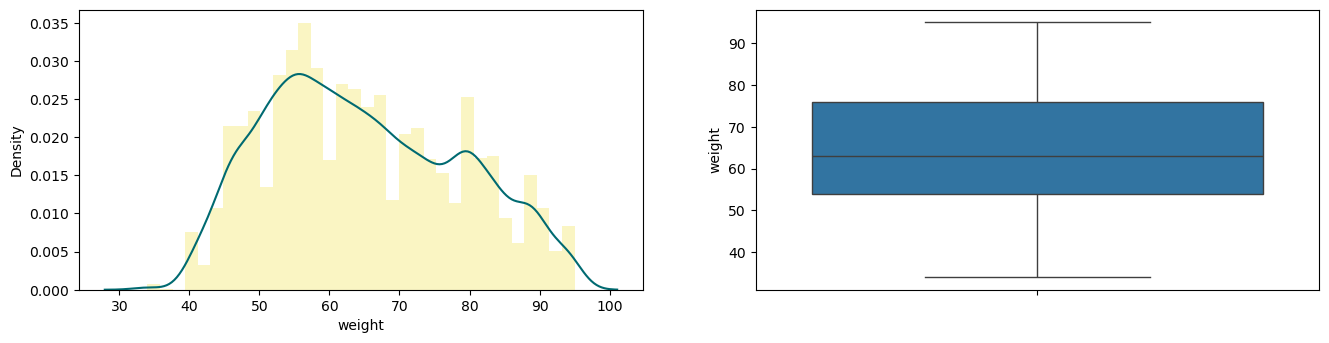

In [73]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['weight'],color="#F4E869", kde_kws={'color': '#006A71'})

plt.subplot(2,2,2)
sns.boxplot(data['weight'])
plt.show()

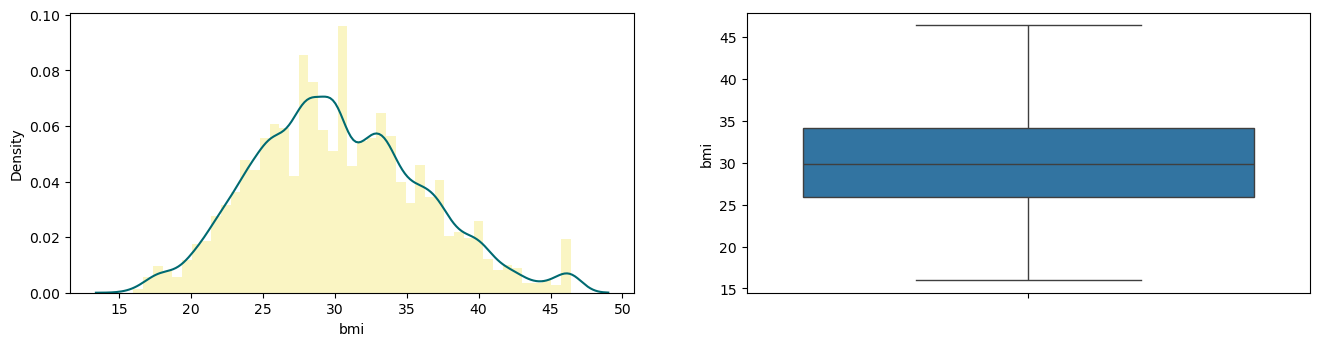

In [74]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['bmi'],color="#F4E869", kde_kws={'color': '#006A71'})

plt.subplot(2,2,2)
sns.boxplot(data['bmi'])
plt.show()

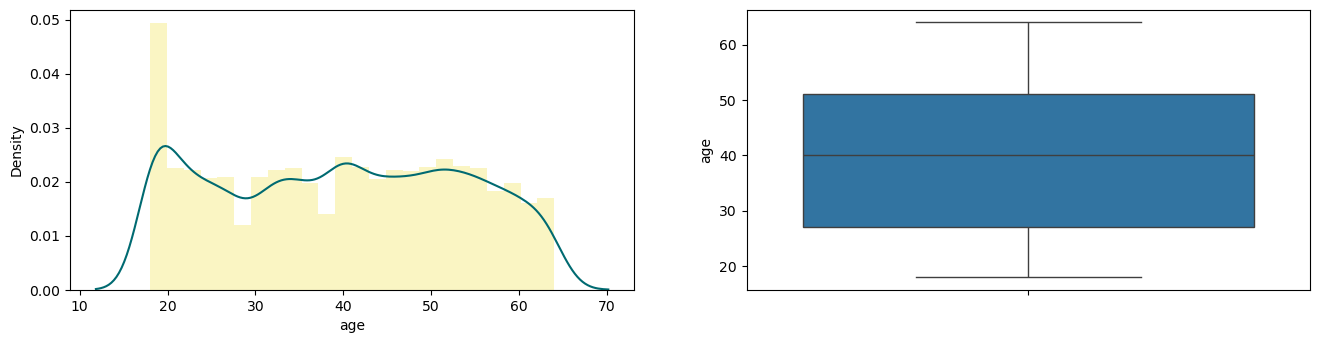

In [75]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['age'],color="#F4E869", kde_kws={'color': '#006A71'})

plt.subplot(2,2,2)
sns.boxplot(data['age'])
plt.show()

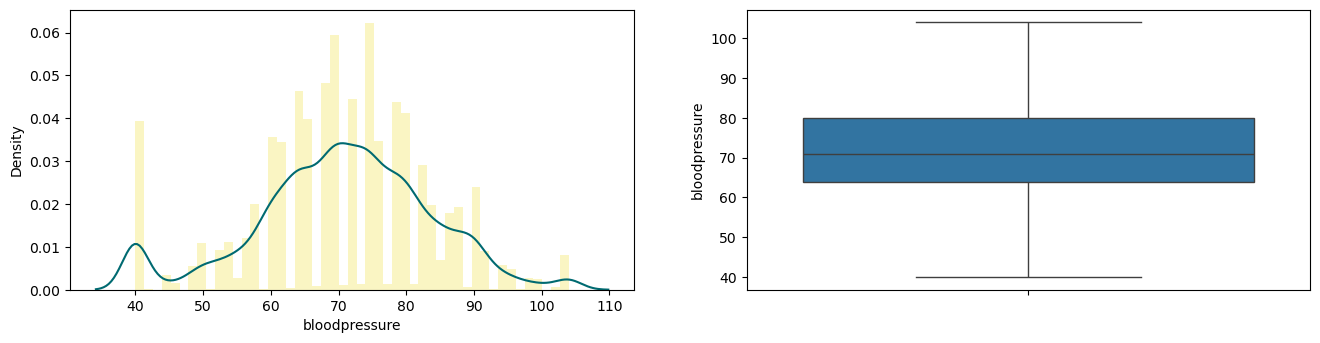

In [76]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['bloodpressure'],color="#F4E869", kde_kws={'color': '#006A71'})

plt.subplot(2,2,2)
sns.boxplot(data['bloodpressure'])
plt.show()

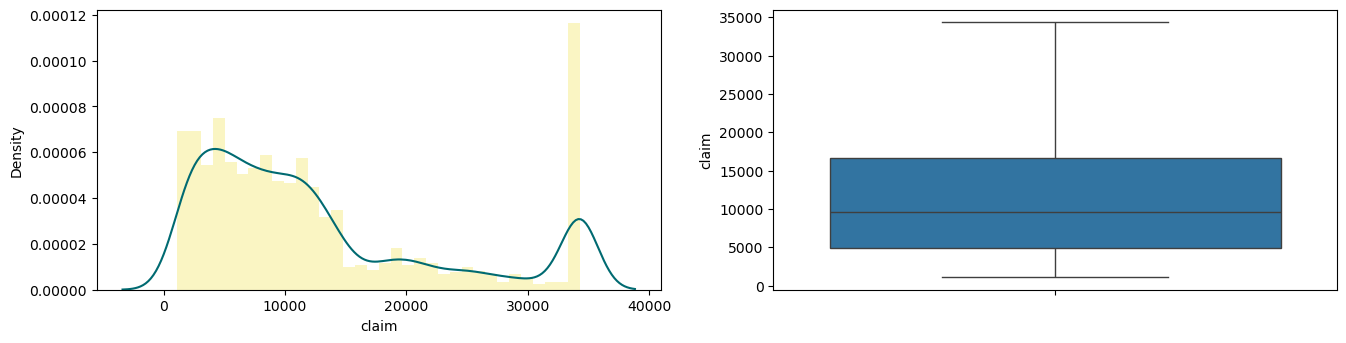

In [77]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['claim'],color="#F4E869", kde_kws={'color': '#006A71'})

plt.subplot(2,2,2)
sns.boxplot(data['claim'])
plt.show()

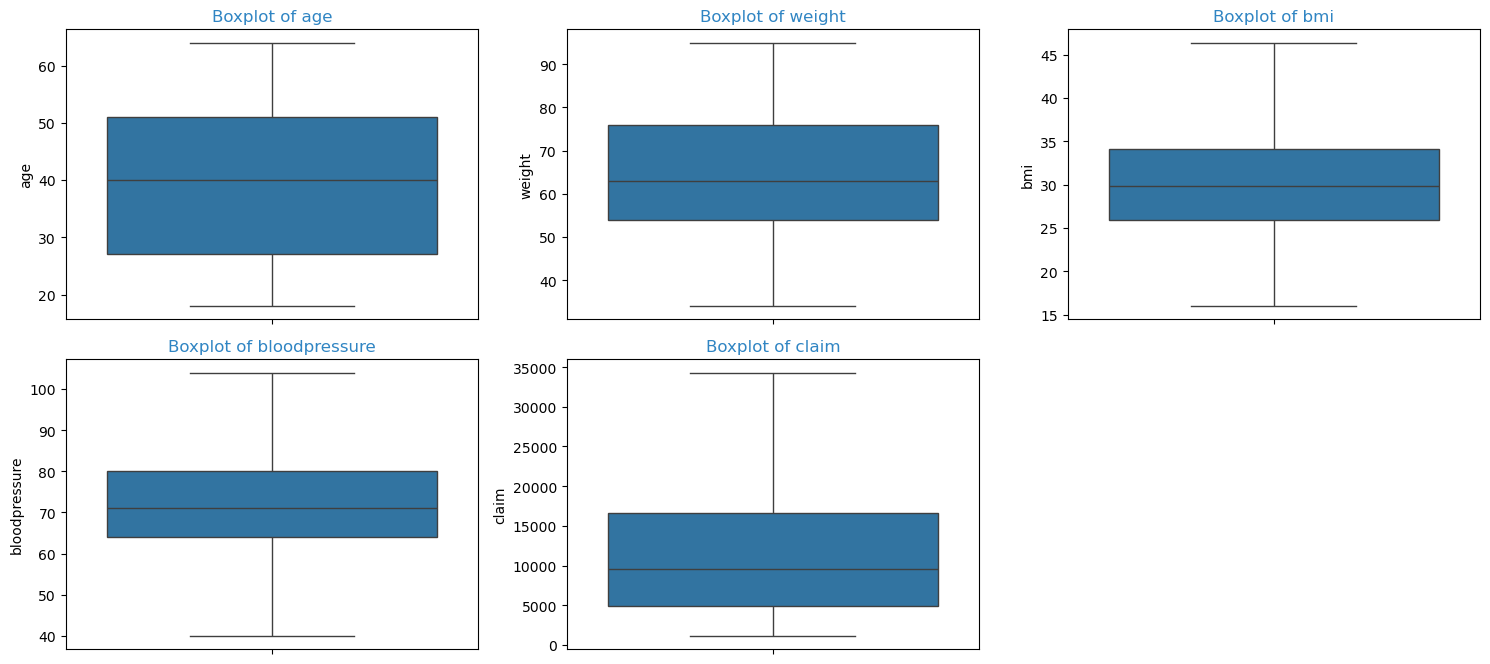

In [78]:
counter = 1
plt.figure(figsize=(15, 10))

for col in num_col:
    plt.subplot(3, 3, counter)  
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}',color='#3085C3')
    counter += 1  

plt.tight_layout()
plt.show()

### Step 5 : Calculating Skewness of Numerical Columns

### **Purpose**
- In this step, we calculate the skewness of numerical columns in the dataset to understand the asymmetry of the data distribution. Skewness helps us determine whether the data is symmetrically distributed, left-skewed (negative skew), or right-skewed (positive skew).
### Why this is important :
- To identify deviations from normality, which can affect statistical modeling.
- Understanding skewness can help in choosing the right statistical methods and algorithms, especially for regression or machine learning models.

In [81]:
for col in num_col:
    skew_value = data[col].skew()
    print (col,":",skew_value)

age : 0.006241188212225505
weight : 0.28672897616305765
bmi : 0.32176942162959143
bloodpressure : -0.2727134510877246
claim : 1.069060975840541


### Step 6 : Kurtosis Analysis of Numerical Features
Kurtosis measures the "tailedness" of a data distribution:
- **High kurtosis**: Indicates heavy tails and more outliers.
- **Low kurtosis**: Suggests lighter tails and fewer outliers.
- **Normal kurtosis**: When the kurtosis is close to 3 (mesokurtic distribution).
### Why this is important :
- To understand the shape of the data distribution, particularly whether it's prone to outliers or extreme values.
- Knowing kurtosis gives deeper insights into the variability and extremities in your data beyond just mean and variance.

In [83]:
for i in data.select_dtypes(include='number'):
    kurtosis=data[i].kurt()
    print("The kurtosis of",i,"is",kurtosis)

The kurtosis of age is -1.2014761084319134
The kurtosis of weight is -0.8620588805429397
The kurtosis of bmi is -0.13055200316309667
The kurtosis of no_of_dependents is 0.20457728186542434
The kurtosis of smoker is 0.2350632975400173
The kurtosis of bloodpressure is 0.20754468384838676
The kurtosis of diabetes is -0.333336487865878
The kurtosis of regular_ex is -0.36561016970310467
The kurtosis of claim is -0.04397269393699954


### Step 7 : Correlation Analysis with Heatmap

#### **Purpose**
- A correlation heatmap helps to analyze the relationships between numerical features in a dataset. It provides a clear visual representation of how strongly features are associated with one another.
- A strong correlation (positive or negative) might indicate redundancy or key influencing factors, which can be useful for feature selection or engineering.
### Why this is important :
- Detect multicollinearity between features
- Identify predictors most associated with the target variable

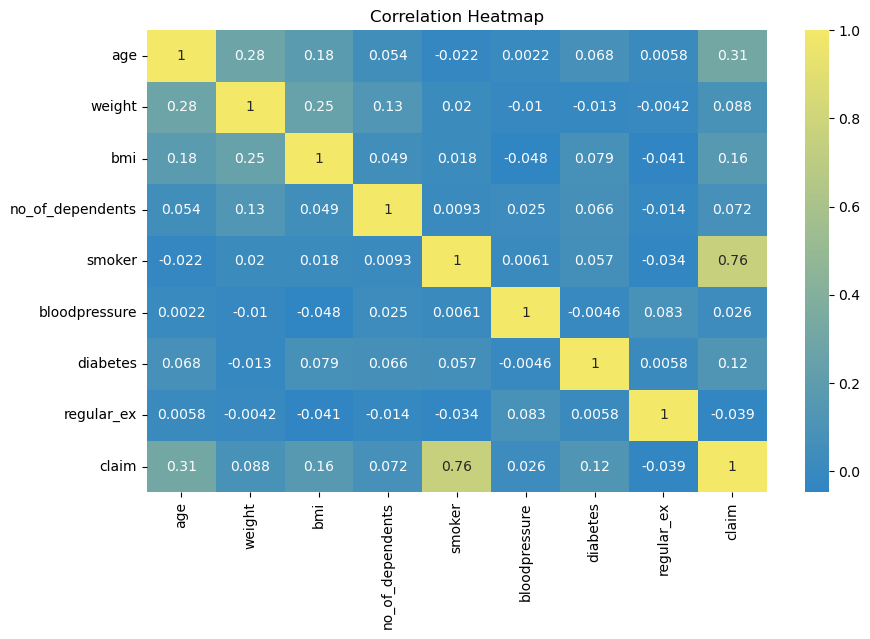

In [85]:
from matplotlib.colors import LinearSegmentedColormap
plt.figure(figsize=(10,6))
custom_cmap = LinearSegmentedColormap.from_list('custom', ['#3085C3','#F4E869'])
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap=custom_cmap)
plt.title("Correlation Heatmap")
plt.show()

# Step 8 : Feature Engineering

## Encoding Categorical columns

In [88]:
data["sex"].unique()

array(['male', 'female'], dtype=object)

### One-Hot Encoding
- **Definition**: Converts categorical values into binary vectors.
- **How It Works**: Creates new columns for each unique category, marking 1 for presence and 0 for absence.
### Why this is important :
- This technique creates binary columns for each category, allowing algorithms to interpret the data without assuming any ordinal relationship between categories.
- One-hot encoding ensures that models can process categorical features effectively without introducing bias due to arbitrary numerical values.

In [90]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
enc_gender=pd.DataFrame(ohe.fit_transform(data[["sex"]]).toarray())
enc_gender.head(3)

0    1
0  0.0  1.0
1  1.0  0.0
2  1.0  0.0

In [91]:
enc_gender.drop(columns=[0],inplace=True)
data["sex"]=enc_gender

In [92]:
data["hereditary_diseases"].unique()

array(['NoDisease', 'Epilepsy', 'EyeDisease', 'Alzheimer', 'Arthritis',
       'HeartDisease', 'Diabetes', 'Cancer', 'High BP', 'Obesity'],
      dtype=object)

### Bina Encoding 
- **Definition**: A binary encoder can be useful especially when handling categorical data and feature engineering.
### How It Work 
- **Feature Encoding**: Converts categorical variables into a binary format for models like neural networks.

- **Dimensionality Reduction**: Helps compress large data inputs into smaller, structured representations.

### Why this is important :
- **Improves Model Performance**: Encoded data is more suitable for algorithms that require numerical inputs.

- **Enhances Data Efficiency**: Reduces redundancy and makes computation faster for training models.

In [94]:
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['hereditary_diseases'])
encoded_hereditary= encoder.fit_transform(data["hereditary_diseases"])
data = pd.concat([data, encoded_hereditary], axis=1)
data.drop(columns=['hereditary_diseases'], inplace=True)

In [95]:
data["city"].unique()

array(['NewYork', 'Boston', 'Phildelphia', 'Pittsburg', 'Buffalo',
       'AtlanticCity', 'Portland', 'Cambridge', 'Hartford', 'Springfield',
       'Syracuse', 'Baltimore', 'York', 'Trenton', 'Warwick',
       'WashingtonDC', 'Providence', 'Harrisburg', 'Newport', 'Stamford',
       'Worcester', 'Atlanta', 'Brimingham', 'Charleston', 'Charlotte',
       'Louisville', 'Memphis', 'Nashville', 'NewOrleans', 'Raleigh',
       'Houston', 'Georgia', 'Oklahoma', 'Orlando', 'Macon', 'Huntsville',
       'Knoxville', 'Florence', 'Miami', 'Tampa', 'PanamaCity',
       'Kingsport', 'Marshall', 'Mandan', 'Waterloo', 'IowaCity',
       'Columbia', 'Indianapolis', 'Cincinnati', 'Bloomington', 'Salina',
       'KanasCity', 'Brookings', 'Minot', 'Chicago', 'Lincoln',
       'FallsCity', 'GrandForks', 'Fargo', 'Cleveland', 'Canton',
       'Columbus', 'Rochester', 'Minneapolis', 'JeffersonCity',
       'Escabana', 'Youngstown', 'SantaRosa', 'Eureka', 'SanFrancisco',
       'SanJose', 'LosAngeles', 'Ox

In [96]:
encoder = ce.BinaryEncoder(cols=['city'])
encoded_city= encoder.fit_transform(data["city"])
data = pd.concat([data, encoded_city], axis=1)
data.drop(columns=['city'], inplace=True)

In [97]:
data["job_title"].unique()

array(['Actor', 'Engineer', 'Academician', 'Chef', 'HomeMakers', 'Dancer',
       'Singer', 'DataScientist', 'Police', 'Student', 'Doctor',
       'Manager', 'Photographer', 'Beautician', 'CA', 'Blogger', 'CEO',
       'Labourer', 'Accountant', 'FilmDirector', 'Technician',
       'FashionDesigner', 'Architect', 'HouseKeeper', 'FilmMaker',
       'Buisnessman', 'Politician', 'DefencePersonnels', 'Analyst',
       'Clerks', 'ITProfessional', 'Farmer', 'Journalist', 'Lawyer',
       'GovEmployee'], dtype=object)

In [98]:
encoder = ce.BinaryEncoder(cols=['job_title'])
encoded_job_title= encoder.fit_transform(data['job_title'])
data = pd.concat([data, encoded_job_title], axis=1)
data.drop(columns=['job_title'], inplace=True)

#### Converting Data Types of Columns

In [100]:
data['age'] = data['age'].astype(int)
data['sex'] = data['sex'].astype(int)

In [101]:
data.head()

age  sex  weight   bmi  no_of_dependents  smoker  bloodpressure  diabetes  \
0   60    1    64.0  24.3                 1       0           72.0         0   
1   49    0    75.0  22.6                 1       0           78.0         1   
2   32    0    64.0  17.8                 2       1           88.0         1   
3   61    0    53.0  36.4                 1       1           72.0         1   
4   19    0    50.0  20.6                 0       0           82.0         1   

   regular_ex    claim  ...  city_3  city_4  city_5  city_6  job_title_0  \
0           0  13112.6  ...       0       0       0       1            0   
1           1   9567.0  ...       0       0       1       0            0   
2           1  32734.2  ...       0       0       1       1            0   
3           0  34318.4  ...       0       1       0       0            0   
4           0   1731.7  ...       0       1       0       1            0   

   job_title_1  job_title_2  job_title_3  job_title_4  job_title_5  
0            0            0            0            0            1  
1            0            0            0            1            0  
2            0            0            0            1            1  
3            0            0            1            0            0  
4            0            0            1            0            1  

[5 rows x 27 columns]

In [102]:
data.columns

Index(['age', 'sex', 'weight', 'bmi', 'no_of_dependents', 'smoker',
       'bloodpressure', 'diabetes', 'regular_ex', 'claim',
       'hereditary_diseases_0', 'hereditary_diseases_1',
       'hereditary_diseases_2', 'hereditary_diseases_3', 'city_0', 'city_1',
       'city_2', 'city_3', 'city_4', 'city_5', 'city_6', 'job_title_0',
       'job_title_1', 'job_title_2', 'job_title_3', 'job_title_4',
       'job_title_5'],
      dtype='object')

# Step 9 : Dropping unused columns from the Dataset

#### **Purpose**
Certain columns in the dataset are irrelevant to the feature set used for modeling. Removing these columns reduces noise and focuses the data on predictive variables.

#### **Dropped Columns**
- **City**: The geographical location of the individual.
- **Job Title**: The occupation of the individual.
- **Sex**: The gender of the individual, excluded for simplicity.
- **Regular Exercise**: The exercise habits of the individual.
- **Weight**: The body weight of the individual.

#### **Reason for Removal**
- These columns are not considered significant predictors in the context of the current machine learning model.
- Dropping unused columns streamlines data preprocessing and optimizes feature selection.

In [105]:
data.drop(['city_0', 'city_1','city_2', 'city_3', 'city_4', 'city_5','city_6','job_title_0','job_title_1', 'job_title_2', 'job_title_3', 'job_title_4',
       'job_title_5','sex','regular_ex','weight'],axis=1,inplace=True)

# Step 10 : Feature Scaling

### Purpose 
- Feature scaling is the process of normalizing the range of independent variables (features) in the dataset. It ensures that no single feature dominates others due to its scale, which is especially important for distance-based models and gradient descent optimization.
- We used **StandardScaler** (Z-score normalization), which transforms the data such that the mean is 0 and the standard deviation is 1
### Why this is important :
- This step is crucial before training models like Linear Regression, SVM, or KNN.

In [108]:
from sklearn.preprocessing import StandardScaler
scaled_cols = ['age', 'bmi','hereditary_diseases_0', 'hereditary_diseases_1',
       'hereditary_diseases_2', 'hereditary_diseases_3','bloodpressure','smoker','diabetes','no_of_dependents']
scaler = StandardScaler()
data[scaled_cols] = scaler.fit_transform(data[scaled_cols])

### Splitting Features and Target Variables

In [110]:
x=data.drop(['claim'],axis=1)
y=data['claim']

#  Step 11 : Data Splitting

### Splitting dataset into training and testing sets
### **Purpose** 
- To evaluate our machine learning model effectively, we split the dataset into **training** and **testing** subsets. 
- **Training Set**: Used to train the machine learning model.
- **Testing Set**: Used to evaluate the model's performance on unseen data.
### Why this is important :
This step is crucial to prevent **overfitting**—a situation where the model performs well on the training data but poorly on new, unseen data. By keeping a portion of the data aside for testing, we ensure that our model generalizes well.

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.30, random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"Y_test shape: {Y_test.shape}")

X_train shape: (9732, 10)
X_test shape: (4172, 10)
Y_train shape: (9732,)
Y_test shape: (4172,)


In [115]:
X_train.head()

age       bmi  no_of_dependents    smoker  bloodpressure  \
5328   1.407161 -0.810329         -0.103163 -0.501034       1.479116   
1423  -0.979347 -0.248023         -0.919078 -0.501034      -2.336513   
11389 -0.545436 -0.094667         -0.919078 -0.501034       0.563365   
256   -0.690073 -0.316181         -0.103163  1.995874      -1.115512   
11997  0.467022 -0.367300         -0.103163 -0.501034       0.715990   

       diabetes  hereditary_diseases_0  hereditary_diseases_1  \
5328   0.544769              -0.149005              -0.182466   
1423  -1.835641              -0.149005              -0.182466   
11389  0.544769              -0.149005              -0.182466   
256    0.544769              -0.149005              -0.182466   
11997  0.544769              -0.149005              -0.182466   

       hereditary_diseases_2  hereditary_diseases_3  
5328               -0.201402               0.200627  
1423               -0.201402               0.200627  
11389              -0.201402               0.200627  
256                -0.201402               0.200627  
11997              -0.201402               0.200627

In [116]:
X_test.head()

age       bmi  no_of_dependents    smoker  bloodpressure  \
6703   1.262525  1.728567         -0.919078 -0.501034      -0.047136   
13765  0.828614  0.518758          1.528668 -0.501034      -2.336513   
1385   1.334843 -0.861447         -0.919078 -0.501034      -0.505011   
6790   1.117888  0.416520         -0.103163 -0.501034      -2.336513   
169   -0.111526  0.126848         -0.103163 -0.501034       0.563365   

       diabetes  hereditary_diseases_0  hereditary_diseases_1  \
6703   0.544769              -0.149005              -0.182466   
13765  0.544769              -0.149005              -0.182466   
1385   0.544769              -0.149005              -0.182466   
6790   0.544769              -0.149005              -0.182466   
169    0.544769              -0.149005              -0.182466   

       hereditary_diseases_2  hereditary_diseases_3  
6703               -0.201402               0.200627  
13765              -0.201402               0.200627  
1385               -0.201402               0.200627  
6790               -0.201402               0.200627  
169                -0.201402               0.200627

In [117]:
Y_train.head()

5328     12914.0
1423      3385.4
11389     4357.0
256      19522.0
11997     8233.1
Name: claim, dtype: float64

In [118]:
Y_test.head()

6703     10982.5
13765    10560.5
1385     11931.1
6790     10807.5
169       5488.3
Name: claim, dtype: float64

### Step 12 : Variance Inflation Factor (VIF)

#### Multicollinearity Check using VIF (Variance Inflation Factor)
- VIF measures the degree of multicollinearity among features in a dataset.
- It quantifies how much the variance of a regression coefficient is inflated due to multicollinearity.
#### **Interpretation**
- **VIF = 1**: No multicollinearity.
- **VIF < 5**: Acceptable multicollinearity.
- **VIF > 10**: High multicollinearity, which might distort model predictions.p-values


### Why this is important :
- Ensure stability and reliability of the regression model  
- Reduce redundancy in features  
- Avoid inflated standard errors and misleading p-values

In [122]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['Feature'] = data.columns
vif_data['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

print(vif_data)

                  Feature       VIF
0                     age  1.101978
1                     bmi  1.071596
2        no_of_dependents  1.013619
3                  smoker  1.531103
4           bloodpressure  1.006569
5                diabetes  1.021645
6                   claim  1.402795
7   hereditary_diseases_0  1.834465
8   hereditary_diseases_1  1.674745
9   hereditary_diseases_2  1.571511
10  hereditary_diseases_3  2.331834


#   Step 13 : PERFORMING MACHINE LEARNING 

### Linear Regression: 

#### **Definition**
- Linear Regression is a fundamental statistical and machine learning method used to model the relationship between dependent (target) and independent (predictor) variables.
- It assumes a linear relationship between input features and the target variable.

In [125]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [126]:
Y_pred_lr = model.predict(X_test)

### Evaluation Metrics of Linear Regression

In [128]:
mse = mean_squared_error(Y_test,Y_pred_lr)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 28121534.14414316


In [129]:
mse = mean_squared_error(Y_test, Y_pred_lr)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 5302.974084807804


In [130]:
mae = mean_absolute_error(Y_test, Y_pred_lr)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 3456.7559498434202


In [131]:
r2 = r2_score(Y_test,Y_pred_lr)
print(f'R-squared: {r2}')

R-squared: 0.7361529298538161


### K-Nearest Neighbors (KNN) Regression

#### **Definition**
- KNN Regression is a non-parametric algorithm that predicts the target value for a data point based on the average (or weighted average) of its k nearest neighbors in the feature space.

#### **How It Works**
1. The algorithm calculates the distance (e.g., Euclidean, Manhattan) between the data point and all other points in the dataset.
2. It identifies the k closest data points (neighbors).
3. The target value is predicted as the average (or weighted average) of the target values of the k neighbors.

In [133]:
from sklearn.neighbors import KNeighborsRegressor

In [134]:
knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=3)

In [135]:
y_pred_knn = knn_regressor.predict(X_test)

### Evaluation Metrics of KNN Regression

In [137]:
mse = mean_squared_error(Y_test, y_pred_knn)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 4649462.04


In [138]:
rmse = mean_squared_error(Y_test, y_pred_knn)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 2156.2611261560432


In [139]:
mae = mean_absolute_error(Y_test, y_pred_knn)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 407.99950463406867


In [140]:
r2 = r2_score(Y_test,y_pred_knn)
print(f'R-squared: {r2}')

R-squared: 0.9563769554028371


### Decision Tree Regressor

#### **Definition**
- A Decision Tree Regressor is a machine learning algorithm that uses a tree-like structure to predict continuous values based on input features.
- It splits the data into subsets based on feature values, creating decision rules to minimize errors.

#### **Key Features**
- Works by dividing the feature space into smaller regions.
- Predictions are made based on the average target value within each region (leaf).

In [142]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [143]:
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

In [144]:
y_pred_dt = dt_regressor.predict(X_test)

### Evaluation Metrics of Decision Tree Regressor

In [146]:
mse_dt = mean_squared_error(Y_test, y_pred_dt)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 4649462.04


In [147]:
rmse = mean_squared_error(Y_test, y_pred_dt)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 2156.2611261560432


In [148]:
mae = mean_absolute_error(Y_test, y_pred_dt)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 396.5829186641214


In [149]:
r2 = r2_score(Y_test,y_pred_dt)
print(f'R-squared: {r2}')

R-squared: 0.9475775985509728


### Random Forest Regressor

#### **Definition**
- A Random Forest Regressor is an ensemble learning algorithm that builds multiple decision trees during training and averages their predictions to improve accuracy and reduce overfitting.

#### **Key Features**
- **Robust to Overfitting**: Aggregating predictions from multiple trees reduces variance.
- **Handles Non-Linearity**: Capable of modeling non-linear relationships effectively.
- **Feature Importance**: Provides insights into the relative importance of features.

In [151]:
from sklearn.ensemble import RandomForestRegressor

In [152]:
rf_regressor = RandomForestRegressor(random_state=42)

# Train the model
rf_regressor.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [153]:
y_pred_rf = rf_regressor.predict(X_test)

### Evaluation Metrics of Random Forest Regressor

In [155]:
mse = mean_squared_error(Y_test, y_pred_rf)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 3599214.04


In [156]:
rmse = mean_squared_error(Y_test, y_pred_rf)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 1897.1594661842014


In [157]:
mae = mean_absolute_error(Y_test, y_pred_rf)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 346.7060598835414


In [158]:
r2 = r2_score(Y_test,y_pred_rf)
print(f'R-squared: {r2}')

R-squared: 0.9662307868962511


# Step 14 : Performance of Various ML Models

### Model Performance Evaluation
- In this step, we evaluate the performance of different machine learning models. 
### Why this is important :
- This comparison helps us understand which model performs best on the given dataset and is most suitable for deployment. By analyzing performance, we can make informed decisions, identify overfitting or underfitting, and ensure the chosen model generalizes well to unseen data.

In [161]:
print("Performance of various ML models used:")
print('--------------------------------------')
print("Linear Regression:",str(np.round(model.score(X_test,Y_test)*100,2)) + '%')
print("K Neighbors Regressor:",str(np.round(knn_regressor.score(X_test,Y_test)*100,2)) + '%')
print("Decision Tree Regressor:",str(np.round(dt_regressor.score(X_test,Y_test)*100,2)) + '%')
print("Random Forest Regressor:",str(np.round(rf_regressor.score(X_test,Y_test)*100,2)) + '%')

Performance of various ML models used:
--------------------------------------
Linear Regression: 73.62%
K Neighbors Regressor: 95.64%
Decision Tree Regressor: 94.76%
Random Forest Regressor: 96.62%


# Step 15 : Making Predictions Using Different Models

## Model Predictions and Comparison
- In this step, we generate predictions using multiple machine learning models to evaluate and compare their performance. 
- By applying different algorithms (such as Linear Regression, Decision Trees, Random Forest etc.), we aim to identify the model that best captures the patterns in the data and delivers the highest accuracy or desired performance metric.
### Why this is important :
- This helps ensure we choose the most effective model for our specific task or problem.

In [164]:
# Make predictions using the Linear Regression (LR) model on the test data
y_pred1 = model.predict(X_test)

# Make predictions using the KNeighbour Regressor model on the test data
y_pred2 = knn_regressor.predict(X_test)

# Make predictions using the Random Forest Regressor (RF) model on the test data
y_pred3 = rf_regressor.predict(X_test)

# Make predictions using the Decision Tree model on the test data
y_pred4 = dt_regressor.predict(X_test)

# DataFrame to compare actual and predicted values
df = pd.DataFrame({'Actual': Y_test, 'LR': Y_pred_lr, 'KNN': y_pred_knn, 'RF': y_pred_rf, 'DT': y_pred_dt})
df

Actual            LR           KNN         RF       DT
6703   10982.5  13505.865059  10982.500000  11079.765  10982.5
13765  10560.5  12068.349754  10560.500000  10560.500  10560.5
1385   11931.1  11970.590545  11931.100000  11931.100  11931.1
6790   10807.5  12105.439632  10807.500000  10807.500  10807.5
169     5488.3   8645.444736   6581.866667   5689.520   5488.3
...        ...           ...           ...        ...      ...
12083  14210.5  14709.129548  14210.500000  14210.500  14210.5
3470    1704.6   1652.705414   1704.600000   1704.600   1704.6
12200   7935.3  10006.739233   7935.300000   7935.300   7935.3
12437   2842.8   4065.516673   2842.800000   2837.902   2842.8
1195    9391.4  11489.502723   9391.400000   9391.400   9391.4

[4172 rows x 5 columns]

### Step: 16 Visualizing Model Accuracy Using Bar Plots
- In this step, we create bar plots to visually compare the accuracy of different machine learning models. Each bar in the plot represents a specific model and its corresponding accuracy score.
### Why this is important :
- Visualizing model accuracy using bar plots allows for an easy and intuitive comparison of performance across models. While numerical accuracy values are informative, a bar chart makes it immediately clear which models are performing better or worse. 
- Overall, this step helps guide model selection and ensures informed decision-making in the model evaluation process.

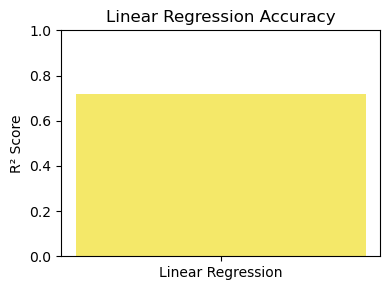

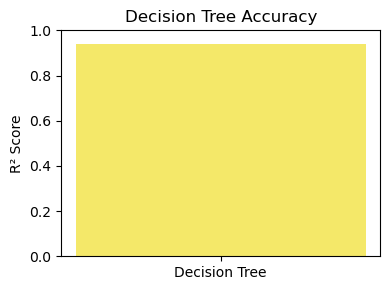

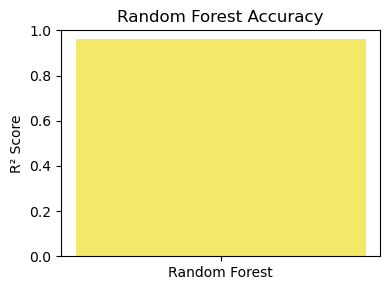

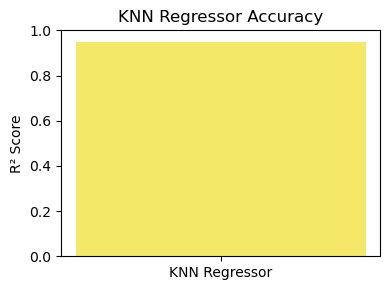

In [166]:
import matplotlib.pyplot as plt

model_scores = {
    "Linear Regression": 0.72,
    "Decision Tree": 0.94,
    "Random Forest": 0.96,
    "KNN Regressor": 0.95
}

# Create individual bar plots
for model, score in model_scores.items():
    plt.figure(figsize=(4, 3))
    plt.bar(model, score, color='#F4E869')
    plt.ylim(0, 1)
    plt.title(f"{model} Accuracy")
    plt.ylabel("R² Score")
    plt.tight_layout()
    plt.show()

### Step 18 :  Predict Claim for new Customer

### In our  situation Random Forest regressor, is the best regression model and may be used to calculate insurance of patients/clients using this best model

In [169]:
x.columns

Index(['age', 'bmi', 'no_of_dependents', 'smoker', 'bloodpressure', 'diabetes',
       'hereditary_diseases_0', 'hereditary_diseases_1',
       'hereditary_diseases_2', 'hereditary_diseases_3'],
      dtype='object')

In [170]:
Rohit_details = [[40,29,2,1,90,1,0,1,0,0]]
Rohit_charge = rf_regressor.predict(scaler.transform(Rohit_details))
print(f"The cost of medical insurance claim for Rohit is: {Rohit_charge[0]:.2f}")

The cost of medical insurance claim for Rohit is: 23092.58


In [171]:
Ananya_details = [[35,23,2,0,80,0,0,0,0,0]]
Ananya_charge = rf_regressor.predict(scaler.transform(Ananya_details))
print(f"The cost of medical insurance claim for Ananya is: {Ananya_charge[0]:.2f}")

The cost of medical insurance claim for Ananya is: 11517.94
